# Capstone Project
# NUTRANO 2020 CITRUS OLEOCELLOSIS DEFECT & WEATHER CORRELATE ANALYSIS

25/12/2020 Author: Yi-Chiao Tsai

## 1. Introduction

### 1.1 Background
Nutrano Produce Group is an international fresh produce company in Australia, operate over 2000 hectares of farms and facilities in Queensland, Victoria, New South Wales and the Northern Territory, with more than 300 dedicated employees.

There are various fruit grow by Nutrano, including lemon, grapefruit, orange, banana, blueberry, mango and more. In the Northern Territory of Australia, there is a Eumaralla farm located in Katherine, grows tropical and citrus fruit. It has a packing capacity of 1,000 citrus cartons and 2,500 mango trays per hour which is also one of the biggest mango farms in NT.

### 1.2 Problem
Oleocellosis phenomenon in citrus fruit is characterized by greenish-brown areas on an orange or yellow background of the flavedo. This colour is the result of essential oil spillage into the subepidermal tissue between the oil glands, which prevents the usual differentiation of chloroplasts into chromoplasts.

Since Nutrano Lemon trials for oleocellosis, I found below: 
1.	Katherine rainwater does not affect the oleocellosis directly.
2.	Sweaty hands do not affect the oleocellosis.
3.	The oleocellosis does not spread out after it sets.
4.	Gloves do not relate to the oleocellosis but may reduce the fruit stress.
5.	Physical pressures do affect oleocellosis.
6.	Oleocellosis defect may cause rot faster.
Now, I would like to know **what relationship between weather condition: temperature, rainfall and humidity and how strongly correlated to oleocellosis.**

### 1.3 Interest
This analysis is primary for minimizing the oleocellosis defect at the Katherine Farm during harvest. The topic would be **interested for the citrus grower, stakeholder, and farmer or citrus related associations.**



## 2. Data acquisition

### 2.1 Data sources

A summary data provided from Nutrano Katherine Eumaralla Farm.

### 2.2 Data cleaning

There were two rows with 'NA' of the oleocellosis defect. In fact, there are many elements than the weather that could affect the fruit defect, even for the problem I may need more data, I could assume the average defect by the similar weather condition, but it also may impact the result by the small database which I removed the two data for less confusion.   

### 2.2 Feature selection

There were 21 rows and 13 features in the data. Upon examining the meaning of each feature, it was clear that there was some redundancy in the features. 

It is efficient productivity that multiple picking lots will be packed together as a batch, but how many percentages in a batch belongs to a picking lot is not related to the weather condition. For the report visualization and a better understanding, I decided to remove the features including [Batch_Percentage] and [Bin_Kg].



In [1]:
#import libraries

import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats

%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression

mpl.style.use('ggplot')

In [2]:
# get the data

data_path ='/Users/Chiao/Desktop/projects/data_science/Nutrano citrus oleo defect 2020.xlsx'
df=pd.read_excel(data_path)
df.head()

,Picking_Date,Block,Bin_Qty,Batch,Batch_Percentage,Bin_Kg,Temp,Var_Temp,Rainfall,Humidity,Oleo,Oleo_pieces,Sampled_pieces
0,2019-11-27,LE1,24,1922,0.260870,230.532609,39,13,0,54,0.4,6.0,2554.0
1,2019-11-28,LE1,29,1922,0.315217,230.532609,40,16,2,69,0.4,6.0,2554.0
2,2019-11-29,LE1,39,1922,0.423913,230.532609,38,10,0,55,0.4,6.0,2554.0
3,2020-01-06,LE2,16,1934,0.800000,234.178947,36,11,0,68,2.5,7.0,505.0
4,2020-01-07,LE2,4,1934,0.200000,234.178947,37,13,0,72,2.5,7.0,505.0


In [3]:
# clean data

df=df.dropna(subset=['Oleo'], axis=0)
df=df.drop(['Batch_Percentage', 'Bin_Kg'], axis=1)
df.tail()

,Picking_Date,Block,Bin_Qty,Batch,Temp,Var_Temp,Rainfall,Humidity,Oleo,Oleo_pieces,Sampled_pieces
16,2020-02-05,LE2,14,1942,36,10,0,73,1.0,3.0,671.0
17,2020-02-06,LE2,9,1942,34,7,0,64,1.0,3.0,671.0
18,2020-02-12,LE1,4,1943,35,10,2,81,0.7,3.0,866.0
19,2020-02-13,LE1,10,1943,37,10,0,78,0.7,3.0,866.0
20,2020-02-14,LE1,12,1943,37,12,0,75,0.7,3.0,866.0


In [4]:
# convert data type

df['Oleo_pieces'] = df['Oleo_pieces'].astype('int')
df['Sampled_pieces'] = df['Sampled_pieces'].astype('int')
df.dtypes

Picking_Date      datetime64[ns]
Block                     object
Bin_Qty                    int64
Batch                      int64
Temp                       int64
Var_Temp                   int64
Rainfall                   int64
Humidity                   int64
Oleo                     float64
Oleo_pieces                int64
Sampled_pieces             int64
dtype: object

In [5]:
# select data and order by ascending

dfWeather = df[['Temp', 'Var_Temp', 'Rainfall', 'Humidity', 'Oleo']]
dfWeather.sort_values(by='Oleo', ascending=True, axis=0, inplace=True)
dfWeather.head(3)

,Temp,Var_Temp,Rainfall,Humidity,Oleo
12,35,7,0,69,0.2
0,39,13,0,54,0.4
1,40,16,2,69,0.4


In [6]:
# check data types and convert to list

print('Columns:', dfWeather.columns.values)
print('Index:', dfWeather.index.values)
print('Type:', type(dfWeather.columns))
print('Type:', type(dfWeather.index))

dfWeather.columns.tolist()
dfWeather.index.tolist()
print ('Transfer to:', type(dfWeather.columns.tolist()))
print ('Transfer to:', type(dfWeather.index.tolist()))
print('Shape:', dfWeather.shape)

Columns: ['Temp' 'Var_Temp' 'Rainfall' 'Humidity' 'Oleo']
Index: [12  0  1  2 15 14 11 10 19 18 20 16 17  9  5  8  6  7  4  3 13]
Type: <class 'pandas.core.indexes.base.Index'>
Type: <class 'pandas.core.indexes.numeric.Int64Index'>
Transfer to: <class 'list'>
Transfer to: <class 'list'>
Shape: (21, 5)


In [7]:
dfWeather.describe()

,Temp,Var_Temp,Rainfall,Humidity,Oleo
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,36.380952,10.714286,4.619048,70.952381,1.085714
std,1.430950,2.216819,10.924634,6.576292,0.809497
min,34.000000,7.000000,0.000000,54.000000,0.200000
25%,35.000000,9.000000,0.000000,69.000000,0.500000
50%,36.000000,10.000000,0.000000,72.000000,0.700000
75%,37.000000,12.000000,4.000000,75.000000,1.400000
max,40.000000,16.000000,50.000000,81.000000,3.300000


## 3. Exploratory Data Analysis

In [8]:
# Pearson Correlation

dfWeather.corr(method='pearson')

,Temp,Var_Temp,Rainfall,Humidity,Oleo
Temp,1.000000,0.729562,-0.089404,-0.359280,-0.189309
Var_Temp,0.729562,1.000000,-0.035688,-0.045566,-0.002388
Rainfall,-0.089404,-0.035688,1.000000,0.184163,0.103386
Humidity,-0.359280,-0.045566,0.184163,1.000000,0.164232
Oleo,-0.189309,-0.002388,0.103386,0.164232,1.000000


### 3.1 Relationship between Oleocellosis and Weather Temperature

The weather was sweltering at Katherine during the citrus growing and harvesting. I assume that the maximum temperature may burst the cell by the harsh heat in Katherine. 
The regression plot shows a weak negative correlation, and the Pearson indicator also shows the same result (Correlation Coefficient=-0.18 and P-value=0.41), the relationship between Oleocellosis and Temperature is faint. The box plot indicates the same as the higher temperature, the lower oleocellosis. 

(32.0, 40.3)

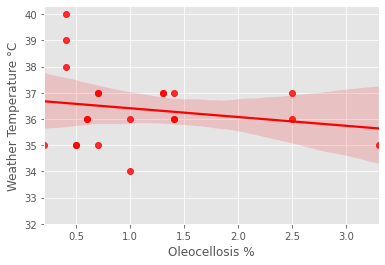

In [9]:
sns.regplot(x = 'Oleo', y = 'Temp', data = dfWeather, color = 'red')
plt.xticks=df.index
plt.xlabel("Oleocellosis %")
plt.ylabel("Weather Temperature °C")
plt.ylim(32,)

Text(0, 0.5, 'Weather Temperature °C')

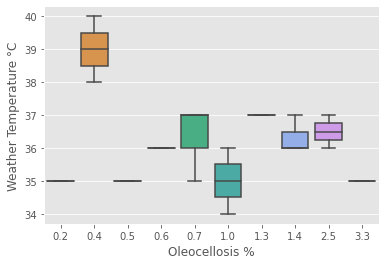

In [10]:
sns.boxplot(x="Oleo", y="Temp", data=dfWeather)
plt.xlabel("Oleocellosis %")
plt.ylabel("Weather Temperature °C")

In [11]:
# get Corrleation Coefficient & P-value

stats.pearsonr(dfWeather['Oleo'],dfWeather['Temp'])

(-0.18930862858260344, 0.41115030062412344)

### 3.2 Relationship between Oleocellosis and Variables of Temperature

How about the temperature variables? Does the temperature change affect the cells and relate to the Oleocellosis? The temperature variable is the temperature range in a day; in other words, the range is a minimum temperature subtracted from a maximum temperature of the day.

The regression plot shows none correlation, and the Pearson indicator also shows the same result (Correlation Coefficient close to 0 and P-value close to 1). There is no any relationship between Oleocellosis and Temperature Variables. The box plot presents an indistinct result.


(6.0, 16.45)

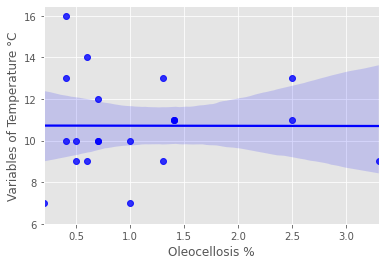

In [12]:
sns.regplot(x = 'Oleo', y = 'Var_Temp', data = dfWeather, color = 'blue')
plt.xlabel("Oleocellosis %")
plt.ylabel("Variables of Temperature °C")
plt.ylim(6,)

Text(0, 0.5, 'Variables of Temperature °C')

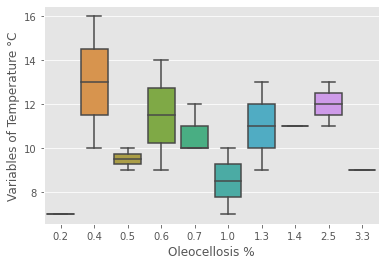

In [13]:
sns.boxplot(x="Oleo", y="Var_Temp", data=dfWeather)
plt.xlabel("Oleocellosis %")
plt.ylabel("Variables of Temperature °C")

In [14]:
# get Corrleation Coefficient & P-value

stats.pearsonr(dfWeather['Oleo'], dfWeather['Var_Temp'])

(-0.0023882383250611785, 0.9918026073989137)

### 3.3 Relationship between Oleocellosis and Rainfall

Refer to the temperature (3.1) and humidity (3.4), the weather of the citrus harvest time is scorching and humid, called a wet season. Envisage our skin pores when we are in a hot shower, we get better clean with the warm water, so the rain for the citrus may work the same that minimize the oil on the rind? or the warm water could explode cells or spread the burst oil on the rind?

The regression plot shows a weak positive correlation, and the Pearson indicator also shows the same result (Correlation Coefficient=0.10 and P-value=0.66). There is a weak relationship between Oleocellosis and Rain. The box plot indicates the same as more the rainfall may cause the higher oleocellosis.

(-10.0, 52.6084054411717)

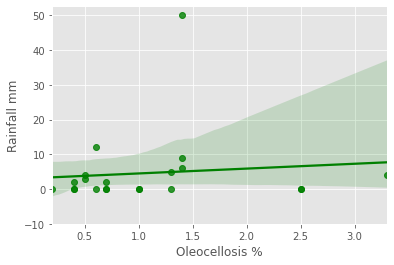

In [15]:
sns.regplot(x = 'Oleo', y = 'Rainfall', data = dfWeather, color = 'green')
plt.xlabel("Oleocellosis %")
plt.ylabel("Rainfall mm")
plt.ylim(-10,)

Text(0, 0.5, 'Rainfall mm')

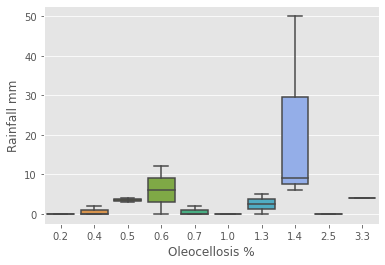

In [16]:
sns.boxplot(x="Oleo", y="Rainfall", data=dfWeather)
plt.xlabel("Oleocellosis %")
plt.ylabel("Rainfall mm")

In [17]:
# get Corrleation Coefficient & P-value

stats.pearsonr(dfWeather['Oleo'], dfWeather['Rainfall'])

(0.10338551708460489, 0.6556263098667056)

### 3.4 Relationship between Oleocellosis and Humidity

There is no doubt that humidity and rain have a strong relationship, but just like the previous example that shower like rain, sauna just like the humidity, when our skin pores widely open because of the warm steaming air in the sauna, we can image there can be some reactions happened in between.

The regression plot shows a slightly weaker positive correlation than rainfall, making sense that there will be some similarity by the strong relationship between the two features. The Pearson indicator also shows the same result (Correlation Coefficient=0.16 and P-value=0.48). There is a weak relationship between Oleocellosis and Rain. The box plot indicates the same as higher humidity the worse oleocellosis.

(50.0, 90.53574617224874)

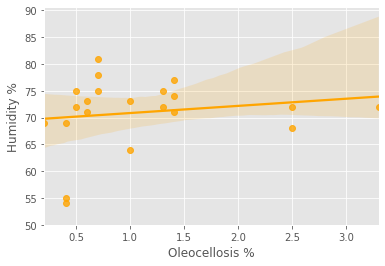

In [18]:
sns.regplot(x = 'Oleo', y = 'Humidity', data = dfWeather, color = 'orange')
plt.xlabel("Oleocellosis %")
plt.ylabel("Humidity %")
plt.ylim(50,)

Text(0, 0.5, 'Humidity %')

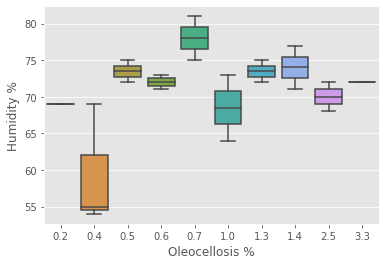

In [19]:
sns.boxplot(x="Oleo", y="Humidity", data=dfWeather)
plt.xlabel("Oleocellosis %")
plt.ylabel("Humidity %")

In [20]:
# get Corrleation Coefficient & P-value

stats.pearsonr(dfWeather['Oleo'], dfWeather['Humidity'])

(0.1642316781684432, 0.47685329099905904)

### References
Read more at Gardening Know How: What Is Oleocellosis – What Causes Spots On Citrus Fruit https://www.gardeningknowhow.com/edible/fruits/citrus/what-is-oleocellosis.htm


## Conclusion section

In this study, I analyzed the relationship between the weather and the citrus fruit defect of oleocellosis. I identified a weak relationship between temperature, rainfall and humidity to the problem; please refer the summary **table** and **Figure**. One discovery the affection of temperature was developed opposite of the rainfall and humidity, which is very interesting for the citrus oleocellosis defect improvement. However, the datasets were quite small; I highly recommend collecting more data for further improvement and exploration.


In [21]:
# summary onto a dataframe

data=[['Weather Temperature', -0.18, 0.41, 'WEAK negative correlation', 'HIGHER temperature the LOWER oleocellosis'],
['Variables of Temperature', 0, 1, 'NO correlation', 'Similarity and Indistinctly'],
['Rainfall', 0.10, 0.66, 'WEAK positive correlation', 'MORE rain HIGHER oleocellosis'],
['Humidity', 0.16, 0.48, 'WEAKER positive correlation', 'HIGHER humidity WORSE oleocellosis']]
dfSummary = pd.DataFrame(data, columns=['Feature','Correlation Coefficient', 'P-value', 'Relationship', 'Box Plot'])

dfSummary

,Feature,Correlation Coefficient,P-value,Relationship,Box Plot
0,Weather Temperature,-0.18,0.41,WEAK negative correlation,HIGHER temperature the LOWER oleocellosis
1,Variables of Temperature,0.00,1.00,NO correlation,Similarity and Indistinctly
2,Rainfall,0.10,0.66,WEAK positive correlation,MORE rain HIGHER oleocellosis
3,Humidity,0.16,0.48,WEAKER positive correlation,HIGHER humidity WORSE oleocellosis


<AxesSubplot:xlabel='Oleo'>

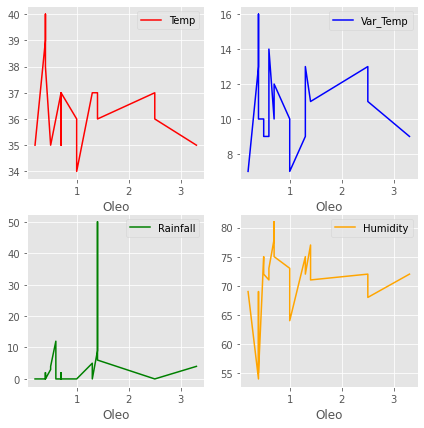

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

(ax1, ax2), (ax3, ax4) = axes

dfWeather.plot(x = 'Oleo', y = 'Temp', kind = 'line', color='red', ax=ax1)
dfWeather.plot(x = 'Oleo', y = 'Var_Temp', kind = 'line', color='blue', ax=ax2)
dfWeather.plot(x = 'Oleo', y = 'Rainfall', kind = 'line', color='green', ax=ax3)
dfWeather.plot(x = 'Oleo', y = 'Humidity', kind = 'line', color='orange', ax=ax4)

## Discussion section

This report with a deeper analysis potential, because there were only 21 datasets from 2020. I knew some people might wonder that we could not  change the weather condition. Especially, nature does their own works, why should we know the correlation because it helps develop solutions. Example: For the stakeholders, it may help them create a growth regulator for minimizing cell sensitivity. For the grower, it may help adjust the grow and harvest period for maximizing profit. Overall, I hope this report is helping.




## Reference

Nutrano
https://nutrano.com.au
The Nature of Oleocellosis in Citrus Fruits
https://www.journals.uchicago.edu/doi/abs/10.1086/337773?journalCode=botanicalgazette
Citrus Oleocellosis 
https://www.ncbi.nlm.nih.gov


**Thank you for the reading, if any question please contact me, my email is chiao0330@outlook.com**